In [2]:
from dataset import create_dataloaders

# 简单使用
train_loader, val_loader, test_loader, classes = create_dataloaders('Aerial_Landscapes')

# 自定义参数
train_loader, val_loader, test_loader, classes = create_dataloaders(
    root_dir='Aerial_Landscapes',
    batch_size=32,
    split_ratio=[0.7, 0.15, 0.15],
    augmentation_strategy='extensive',
    random_seed=42,
    verbose=True
)

创建数据加载器，batch_size=32, split_ratio=[0.6, 0.2, 0.2], augmentation=default...
数据集大小 - 训练: 7200, 验证: 2400, 测试: 2400
训练集类别分布:
- Agriculture: 480张图像
- Airport: 480张图像
- Beach: 480张图像
- City: 480张图像
- Desert: 480张图像
- Forest: 480张图像
- Grassland: 480张图像
- Highway: 480张图像
- Lake: 480张图像
- Mountain: 480张图像
- Parking: 480张图像
- Port: 480张图像
- Railway: 480张图像
- Residential: 480张图像
- River: 480张图像
创建数据加载器，batch_size=32, split_ratio=[0.7, 0.15, 0.15], augmentation=extensive...
数据集大小 - 训练: 8400, 验证: 1800, 测试: 1800
训练集类别分布:
- Agriculture: 560张图像
- Airport: 560张图像
- Beach: 560张图像
- City: 560张图像
- Desert: 560张图像
- Forest: 560张图像
- Grassland: 560张图像
- Highway: 560张图像
- Lake: 560张图像
- Mountain: 560张图像
- Parking: 560张图像
- Port: 560张图像
- Railway: 560张图像
- Residential: 560张图像
- River: 560张图像


In [4]:
# 自定义参数
train_loader, val_loader, test_loader, classes = create_dataloaders(
    root_dir='Aerial_Landscapes',
    batch_size=32,
    split_ratio=[0.8, 0, 0.2],
    augmentation_strategy='extensive',
    random_seed=42,
    verbose=True
)

创建数据加载器，batch_size=32, split_ratio=[0.8, 0, 0.2], augmentation=extensive...
数据集大小 - 训练: 9600, 验证: 0, 测试: 2400
训练集类别分布:
- Agriculture: 640张图像
- Airport: 640张图像
- Beach: 640张图像
- City: 640张图像
- Desert: 640张图像
- Forest: 640张图像
- Grassland: 640张图像
- Highway: 640张图像
- Lake: 640张图像
- Mountain: 640张图像
- Parking: 640张图像
- Port: 640张图像
- Railway: 640张图像
- Residential: 640张图像
- River: 640张图像


In [3]:
train_loader

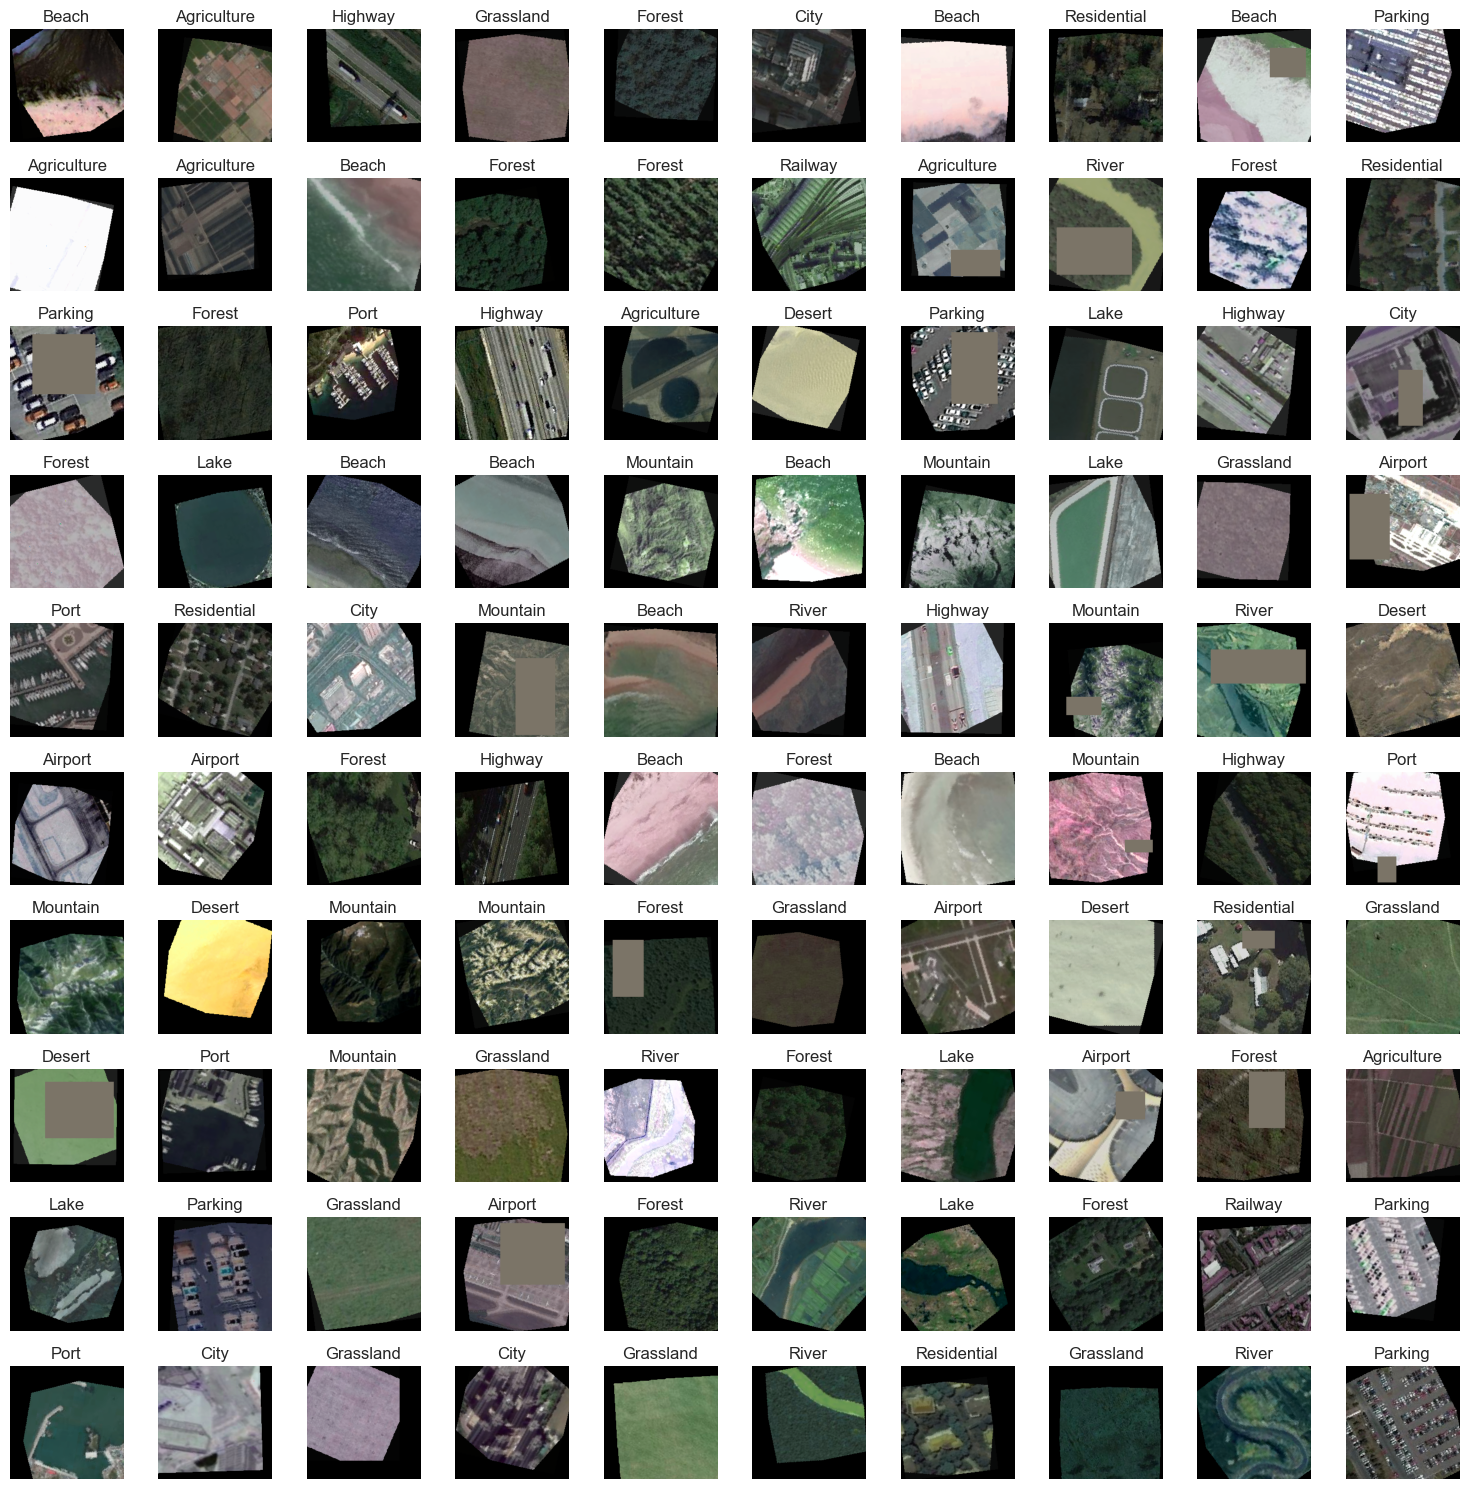

In [5]:
# randomly plot 100 images from train_loader
import matplotlib.pyplot as plt
import numpy as np
import torch
import random

# 设置随机种子以确保结果可复现
random.seed(42)

# 从数据集中随机选择100张图像
dataset = train_loader.dataset
indices = random.sample(range(len(dataset)), min(100, len(dataset)))

# 设置图像布局
rows = int(np.ceil(np.sqrt(len(indices))))
cols = int(np.ceil(len(indices) / rows))

plt.figure(figsize=(15, 15))

for i, idx in enumerate(indices):
    # 获取图像和标签
    img, label = dataset[idx]
    
    # 将图像转换为可显示的格式
    img = img.permute(1, 2, 0).numpy()
    
    # 反归一化图像
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    # 显示图像
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f"{classes[label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
